# Tutoiral 11 - Solution

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Read the CSV file
df = pd.read_csv('heart_disease_data.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [4]:
# Drop the "num" column from the DataFrame
target = df.drop(columns = ['num'], inplace = True)

# Display the DataFrame after dropping the column
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [5]:
# Impute missing values with median
df.fillna(df.median(), inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [7]:
from sklearn.preprocessing import normalize

# Call normalize method to scale the data
df_scaled = normalize(df)

# Convert scaled data into dataframe
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

# Display the scaled data
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.197415,0.003134,0.003134,0.454368,0.730123,0.003134,0.006267,0.470036,0.000000,0.007207,0.009401,0.000000,0.018801
1,0.190579,0.002844,0.011378,0.455113,0.813514,0.000000,0.005689,0.307201,0.002844,0.004267,0.005689,0.008533,0.008533
2,0.225784,0.003370,0.013480,0.404390,0.771710,0.000000,0.006740,0.434719,0.003370,0.008762,0.006740,0.006740,0.023589
3,0.108740,0.002939,0.008817,0.382058,0.734728,0.000000,0.000000,0.549576,0.000000,0.010286,0.008817,0.000000,0.008817
4,0.136818,0.000000,0.006674,0.433813,0.680753,0.000000,0.006674,0.573968,0.000000,0.004672,0.003337,0.000000,0.010011


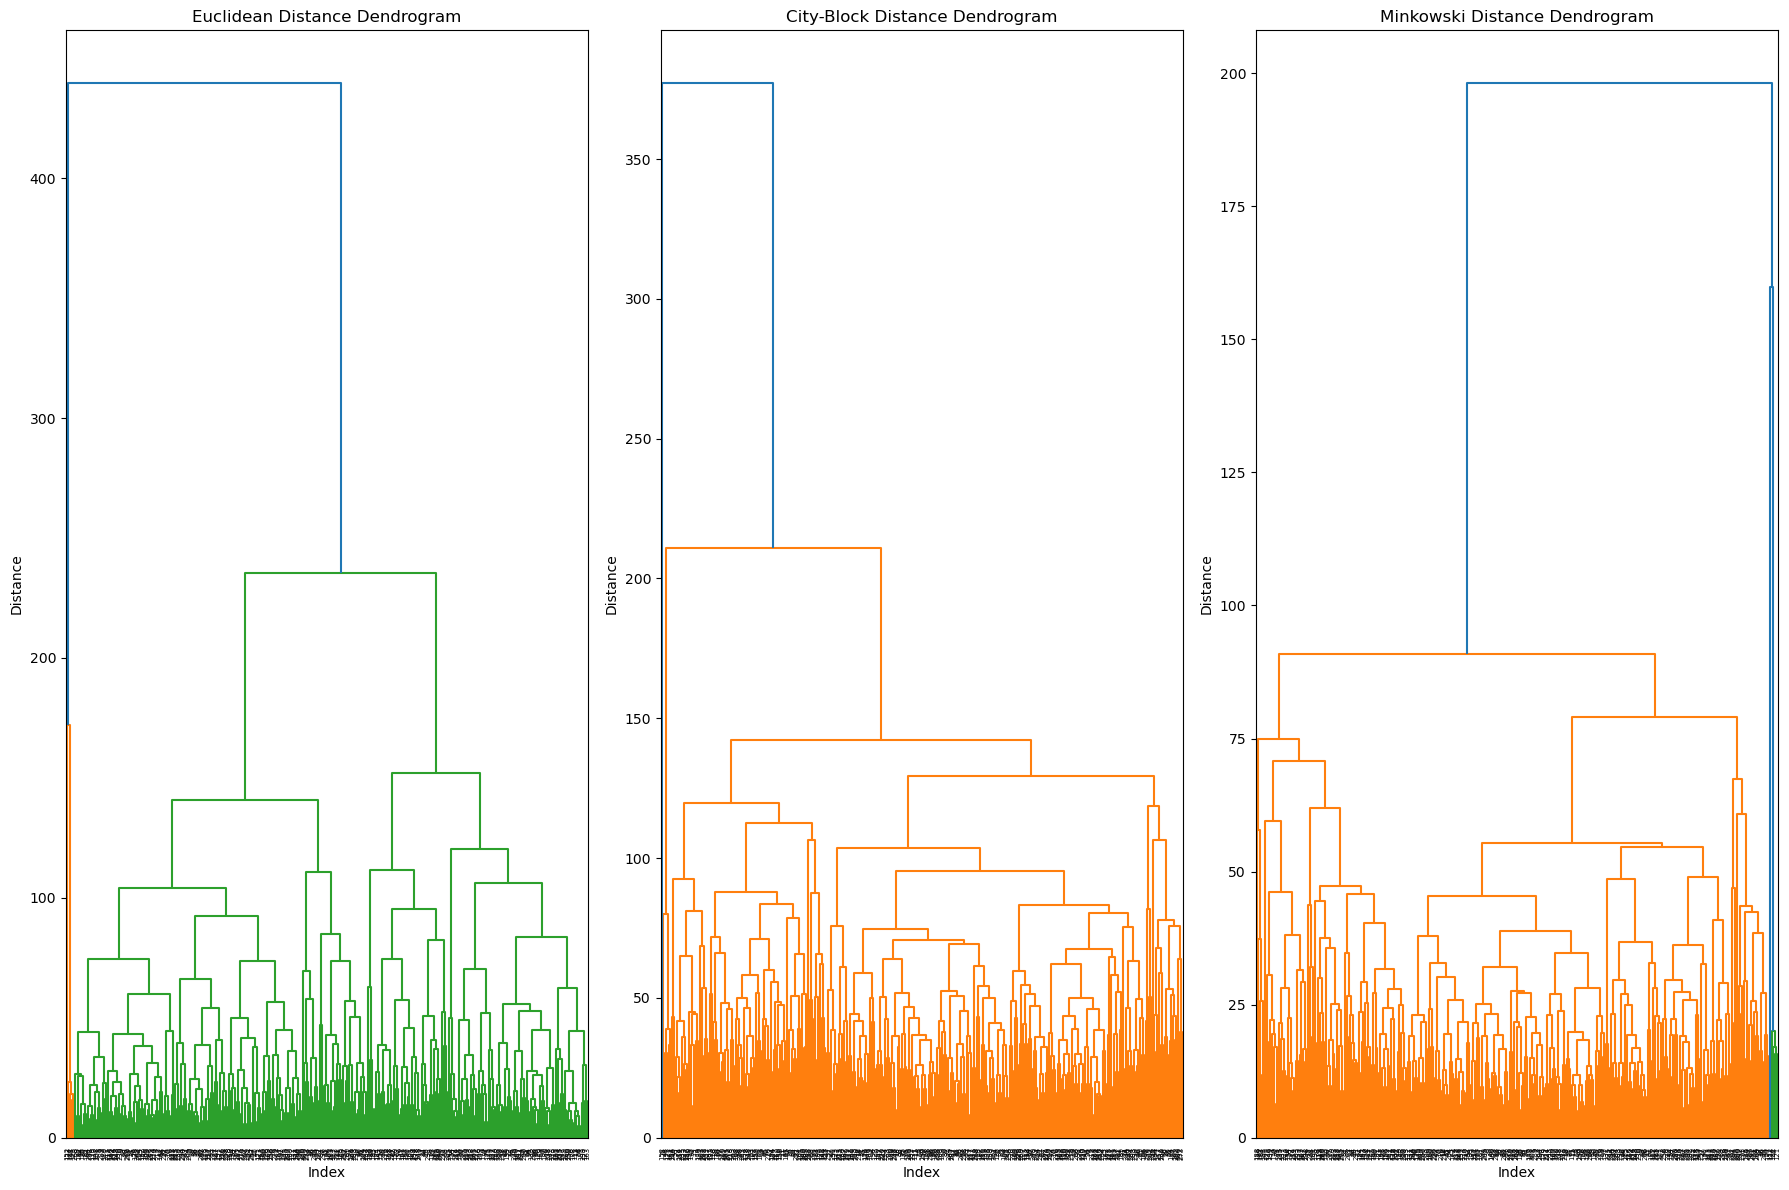

In [8]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Initialize the cluster using AgglomerativeClustering
# For Euclidean distance
cluster_euclidean = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
# For City-Block (Manhattan) distance
cluster_city_block = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')
# For Minkowski distance
cluster_minkowski = AgglomerativeClustering(n_clusters=2, affinity='minkowski', linkage='complete')  

# Call the method for training
labels_euclidean = cluster_euclidean.fit_predict(df)
labels_city_block = cluster_city_block.fit_predict(df)
labels_minkowski = cluster_minkowski.fit_predict(df)

# Compute linkage matrices
Z_euclidean = linkage(df, method='complete', metric='euclidean')
Z_city_block = linkage(df, method='average', metric='cityblock')
Z_minkowski = linkage(df, method='average', metric='minkowski')

# Set the size of the figure 
plt.figure(figsize=(18, 12))

# Plot for Euclidean distance
plt.subplot(1, 3, 1)
dendrogram(Z_euclidean, leaf_rotation=90)
plt.title('Euclidean Distance Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')

# Plot for City-Block (Manhattan) distance
plt.subplot(1, 3, 2)
dendrogram(Z_city_block, leaf_rotation=90)
plt.title('City-Block Distance Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')

# Plot for Minkowski distance
plt.subplot(1, 3, 3)
dendrogram(Z_minkowski, leaf_rotation=90)
plt.title('Minkowski Distance Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()


In [9]:
from sklearn.cluster import AgglomerativeClustering

# Initilise the cluster using a method AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

# Call the method for the training
cluster.fit_predict(df_scaled)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

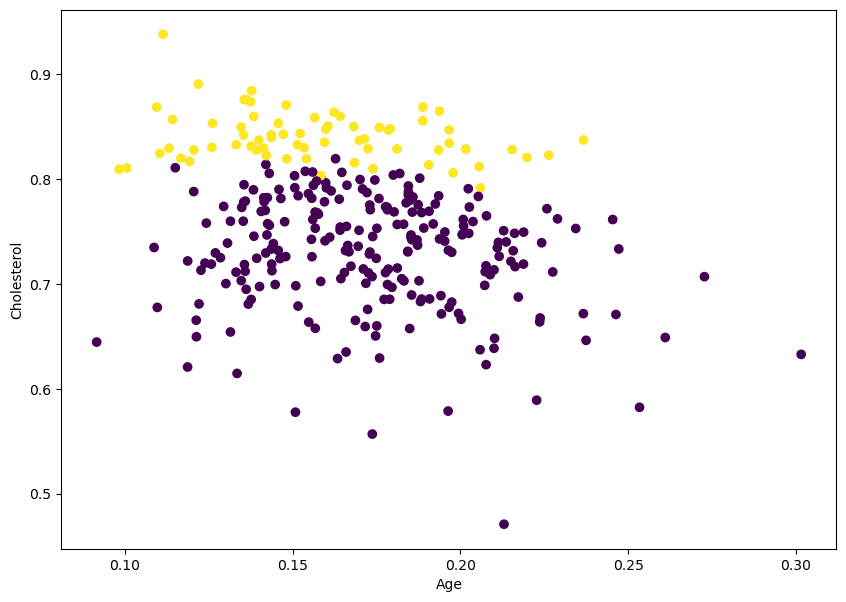

In [10]:
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(10, 7))

# Display scatter plot based on the data_scaled
plt.scatter(df_scaled['age'], df_scaled['chol'], c=cluster.labels_) 

# Set the labels along the horizontal axis (x-axis) and vertical axis (y-axis)
plt.xlabel('Age')
plt.ylabel('Cholesterol')

plt.show()


### Explore yourself other features to extract interesting clutsers and interpret based on the domain of the datset.